# 04wk-1: (신경망) – 로지스틱의 한계 극복

최규빈  
2025-03-26

<a href="https://colab.research.google.com/github/guebin/DL2025/blob/main/posts/04wk-1.ipynb"><img src="https://colab.research.google.com/assets/colab-badge.svg" style="text-align: left"></a>

# 1. 강의영상

<https://youtu.be/playlist?list=PLQqh36zP38-yKvINTSGc6iqt7_o9fIA8E&si=RknliDJnAqAy54Al>

# 2. Imports

In [2]:
import torch
import matplotlib.pyplot as plt 
import pandas as pd

In [3]:
plt.rcParams['figure.figsize'] = (4.5, 3.0)

# 3. 꺽인직선을 만드는 방법

*지난시간복습*

In [42]:
# 오늘의 잔소리.. 
## 회귀(카페예제): yhat=직선=linr(x), 정규분포, MSEloss
## 로지스틱(스펙과취업): yhat=곡선=sig(직선)=sig(linr(x)), 베르누이, BCELoss
## 이름없음(스펙의역설): yhat=꺽인곡선=sig(꺽인직선)=sig(??), 베르누이, BCELOss

`-` 로지스틱의 한계를 극복하기 위해서는 시그모이드를 취하기 전에 꺽인
그래프 모양을 만드는 기술이 있어야겠음.

`-` 아래와 같은 벡터 ${\bf x}$를 가정하자.

In [43]:
x = torch.linspace(-1,1,1001).reshape(-1,1)
x

`-` 목표: 아래와 같은 벡터 ${\bf y}$를 만들어보자.

$${\bf y} = [y_1,y_2,\dots,y_{n}]^\top, \quad y_i = \begin{cases} 9x_i +4.5& x_i <0 \\ -4.5x_i + 4.5& x_i >0 \end{cases}$$

> **Caution**
>
> 일반적으로 제 강의노트에서
>
> -   독립변수 = 설명변수 = ${\bf x}$, ${\bf X}$
> -   종속변수 = 반응변수 = ${\bf y}$
>
> 를 의미하는데요, 여기에서 $({\bf x},{\bf y})$ 는 (독립변수,종속변수)
> 혹은 (설명변수,반응변수) 를 의미하는게 아닙니다.

`# 방법1` – 수식 그대로 구현

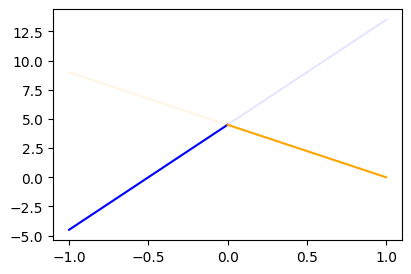

In [44]:
plt.plot(x,9*x+4.5,color="blue",alpha=0.1)
plt.plot(x[x<0], (9*x+4.5)[x<0],color="blue")
plt.plot(x,-4.5*x+4.5,color="orange",alpha=0.1)
plt.plot(x[x>0], (-4.5*x+4.5)[x>0],color="orange")

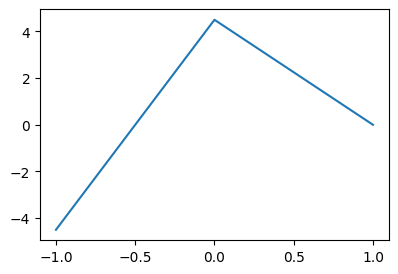

In [45]:
y = x*0
y[x<0] = (9*x+4.5)[x<0]
y[x>0] = (-4.5*x+4.5)[x>0]
plt.plot(x,y)

`#`

`# 방법2` – 렐루이용

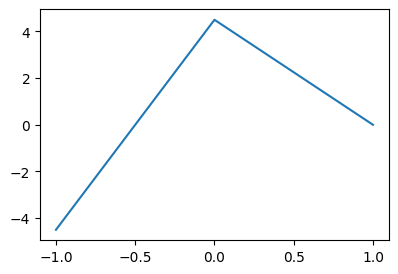

In [46]:
relu = torch.nn.ReLU()
#plt.plot(x,-4.5*relu(x),color="red")
#plt.plot(x,-9*relu(-x),color="blue")
y = -4.5*relu(x) + -9*relu(-x) + 4.5
plt.plot(x,y)

`-` 좀 더 중간과정을 시각화 – (강의때 설명안했음)

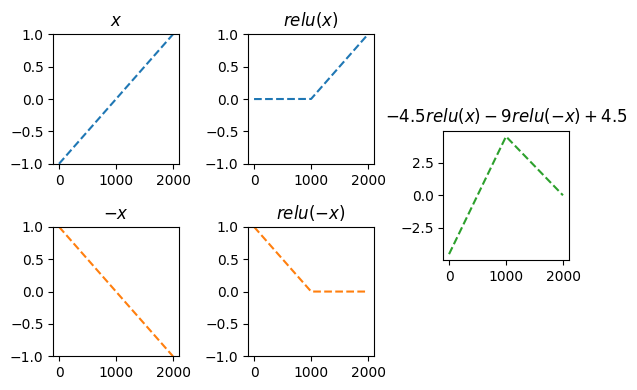

In [71]:
fig = plt.figure(figsize=(6, 4))
spec = fig.add_gridspec(4, 3)
ax1 = fig.add_subplot(spec[:2,0]); ax1.set_title(r'$x$'); ax1.set_ylim(-1,1)
ax2 = fig.add_subplot(spec[2:,0]); ax2.set_title(r'$-x$'); ax2.set_ylim(-1,1)
ax3 = fig.add_subplot(spec[:2,1]); ax3.set_title(r'$relu(x)$'); ax3.set_ylim(-1,1)
ax4 = fig.add_subplot(spec[2:,1]); ax4.set_title(r'$relu(-x)$'); ax4.set_ylim(-1,1)
ax5 = fig.add_subplot(spec[1:3,2]); ax5.set_title(r'$-4.5 relu(x)-9 relu(-x)+4.5$')
#---#
ax1.plot(x,'--',color='C0')
ax2.plot(-x,'--',color='C1')
ax3.plot(relu(x),'--',color='C0')
ax4.plot(relu(-x),'--',color='C1')
ax5.plot(-4.5*relu(x)-9*relu(-x)+4.5,'--',color='C2')
fig.tight_layout()

`#`

`# 방법3` – `relu`의 브로드캐스팅 활용

`-` 우리가 하고 싶은 것

In [48]:
# y = -4.5*relu(x) + -9*relu(-x) + 4.5

`-` 아래와 같은 아이디어로 y를 계산해도 된다.

1.  x, relu 준비
2.  u = \[x -x\]
3.  v = relu(u) = \[relu(x), relu(-x)\] = \[v1 v2\]
4.  y = -4.5\*v1 + -9\*v2 + 4.5

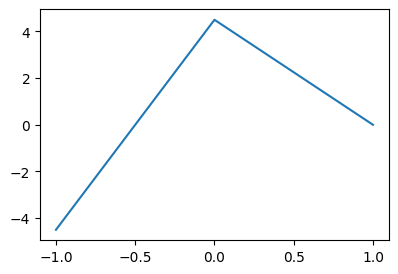

In [49]:
u = torch.concat([x,-x],axis=1)
v = relu(u)
v1 = v[:,[0]]
v2 = v[:,[1]]
y = -4.5*v1 -9*v2 + 4.5 
plt.plot(x,y)

`#`

`# 방법4` – `y = linr(v)`

In [50]:
# 4. y = -4.5*v1 + -9*v2 + 4.5 = [v1 v2] @ [[-4.5],[-9]] + 4.5 
# y = -4 + 3*x = [1 x] @ [[-4],[3]]

In [51]:
x 
u = torch.concat([x,-x],axis=1)
v = relu(u) 
y = v @ torch.tensor([[-4.5],[-9]]) + 4.5 

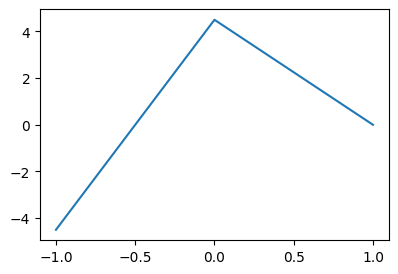

In [52]:
plt.plot(x,y)

`#`

`# 방법5` – `u = linr(x)`

In [53]:
# x 
# u = torch.concat([x,-x],axis=1)
# v = relu(u) 
# y = v @ torch.tensor([[-4.5],[-9]]) + 4.5 

In [54]:
x 
u = x @ torch.tensor([[1.0, -1.0]])
v = relu(u) 
y = v @ torch.tensor([[-4.5],[-9]]) + 4.5 

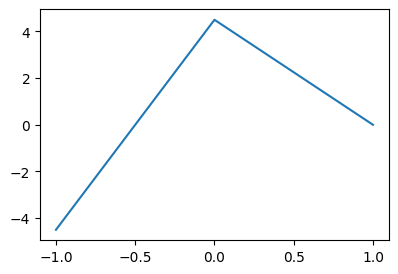

In [55]:
plt.plot(x,y)

`#`

`# 방법6` – `torch.nn.Linear()`를 이용

In [56]:
# x 
# u = x @ torch.tensor([[1.0, -1.0]]) = l1(x) 
# v = relu(u) = a1(u)
# y = v @ torch.tensor([[-4.5],[-9]]) + 4.5 = l2(v) 

In [57]:
# u = l1(x) # l1은 x->u인 선형변환: (n,1) -> (n,2) 인 선형변환
l1 = torch.nn.Linear(1,2,bias=False)
l1.weight.data = torch.tensor([[1.0, -1.0]]).T 
a1 = relu 
l2 = torch.nn.Linear(2,1,bias=True)
l2.weight.data = torch.tensor([[-4.5],[-9]]).T 
l2.bias.data = torch.tensor([4.5])
#---#
x
u = l1(x)
v = a1(u) 
y = l2(v) 

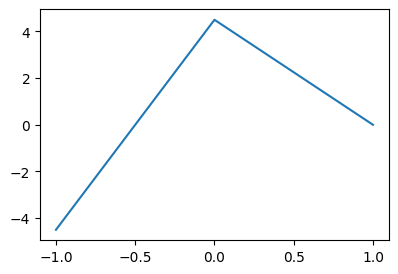

In [58]:
plt.plot(x,y.data)

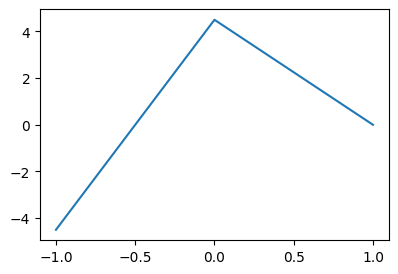

In [59]:
pwlinr = torch.nn.Sequential(l1,a1,l2)
plt.plot(x,pwlinr(x).data)

`#`

> **Note**
>
> ***수식표현***
>
> `(1)` ${\bf X}=\begin{bmatrix} x_1 \\ \dots \\ x_n \end{bmatrix}$
>
> `(2)`
> $l_1({\bf X})={\bf X}{\bf W}^{(1)}\overset{bc}{+} {\boldsymbol b}^{(1)}=\begin{bmatrix} x_1 & -x_1 \\ x_2 & -x_2 \\ \dots & \dots \\ x_n & -x_n\end{bmatrix}$
>
> -   ${\bf W}^{(1)}=\begin{bmatrix} 1 & -1 \end{bmatrix}$
> -   ${\boldsymbol b}^{(1)}=\begin{bmatrix} 0 & 0 \end{bmatrix}$
>
> `(3)`
> $(a_1\circ l_1)({\bf X})=\text{relu}\big({\bf X}{\bf W}^{(1)}\overset{bc}{+}{\boldsymbol b}^{(1)}\big)=\begin{bmatrix} \text{relu}(x_1) & \text{relu}(-x_1) \\ \text{relu}(x_2) & \text{relu}(-x_2) \\ \dots & \dots \\ \text{relu}(x_n) & \text{relu}(-x_n)\end{bmatrix}$
>
> `(4)`
> $(l_2 \circ a_1\circ l_1)({\bf X})=\text{relu}\big({\bf X}{\bf W}^{(1)}\overset{bc}{+}{\boldsymbol b}^{(1)}\big){\bf W}^{(2)}\overset{bc}{+}b^{(2)}$
>
> $\quad=\begin{bmatrix} -4.5\times\text{relu}(x_1) -9.0 \times \text{relu}(-x_1) +4.5 \\ -4.5\times\text{relu}(x_2) -9.0 \times\text{relu}(-x_2) + 4.5 \\ \dots \\ -4.5\times \text{relu}(x_n) -9.0 \times\text{relu}(-x_n)+4.5 \end{bmatrix}$
>
> -   ${\bf W}^{(2)}=\begin{bmatrix} -4.5 \\ -9 \end{bmatrix}$
> -   $b^{(2)}=4.5$
>
> `(5)`
> $\textup{pwlinr}({\bf X})=(l_2 \circ a_1\circ l_1)({\bf X})=\text{relu}\big({\bf X}{\bf W}^{(1)}\overset{bc}{+}{\boldsymbol b}^{(1)}\big){\bf W}^{(2)}\overset{bc}{+}b^{(2)}$
>
> $\quad =\begin{bmatrix} -4.5\times\text{relu}(x_1) -9.0 \times \text{relu}(-x_1) +4.5 \\ -4.5\times\text{relu}(x_2) -9.0 \times\text{relu}(-x_2) + 4.5 \\ \dots \\ -4.5\times \text{relu}(x_n) -9.0 \times\text{relu}(-x_n)+4.5 \end{bmatrix}$

# 4. 스펙의역설 적합

`-` 다시한번 데이터 정리

In [60]:
df = pd.read_csv("https://raw.githubusercontent.com/guebin/DL2025/main/posts/ironyofspec.csv")

In [61]:
x = torch.tensor(df.x).float().reshape(-1,1)
y = torch.tensor(df.y).float().reshape(-1,1)
prob = torch.tensor(df.prob).float().reshape(-1,1)

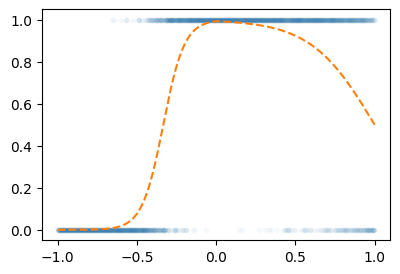

In [62]:
plt.plot(x,y,'.',alpha=0.03)
plt.plot(x,prob,'--')

`-` Step1에 대한 생각: 네트워크를 어떻게 만들까? = 아키텍처를 어떻게
만들까? = 모델링

$$\underset{(n,1)}{\bf X} \overset{l_1}{\to} \underset{(n,2)}{\boldsymbol u^{(1)}} \overset{a_1}{\to} \underset{(n,2)}{\boldsymbol v^{(1)}} \overset{l_1}{\to} \underset{(n,1)}{\boldsymbol u^{(2)}} \overset{a_2}{\to} \underset{(n,1)}{\boldsymbol v^{(2)}}=\underset{(n,1)}{\hat{\boldsymbol y}}$$

-   $l_1$: `torch.nn.Linear(1,2,bias=False)`
-   $a_1$: `torch.nn.ReLU()`
-   $l_2$: `torch.nn.Linear(2,1,bias=True)`
-   $a_2$: `torch.nn.Sigmoid()`

`-` Step1-4

In [63]:
torch.manual_seed(1)
net = torch.nn.Sequential(
    torch.nn.Linear(1,2,bias=False),
    torch.nn.ReLU(),
    torch.nn.Linear(2,1,bias=True),
    torch.nn.Sigmoid()
)
loss_fn = torch.nn.BCELoss() 
optimizr = torch.optim.Adam(net.parameters())

In [64]:
for epoc in range(5000):
    ## step1
    yhat = net(x)
    ## step2
    loss = loss_fn(yhat,y)
    ## step3
    loss.backward()
    ## step4
    optimizr.step()
    optimizr.zero_grad()

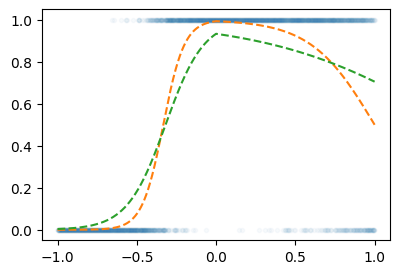

In [65]:
plt.plot(x,y,'.',alpha=0.03)
plt.plot(x,prob,'--')
plt.plot(x,yhat.data,'--')

한번더~

In [66]:
for epoc in range(5000):
    ## step1
    yhat = net(x)
    ## step2
    loss = loss_fn(yhat,y)
    ## step3
    loss.backward()
    ## step4
    optimizr.step()
    optimizr.zero_grad()

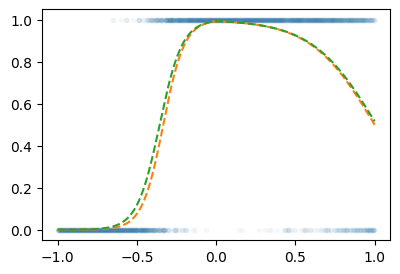

In [67]:
plt.plot(x,y,'.',alpha=0.03)
plt.plot(x,prob,'--')
plt.plot(x,yhat.data,'--')